# Time Series Forecasting - ML

In [1]:
import pandas as pd

In [2]:
# import csv dataset
df=pd.read_csv('divvy-tripdata_cleaned.csv',index_col=1,parse_dates=True)

# make into dataframe
df2=pd.DataFrame(df)

# which columns to include alongside column acting as index
cols=[3]
df2=df2[df2.columns[cols]]

# printing the first 5 rows
df2.head()

,trip_duration
start_time,
2013-08-16 17:40:00,2729
2014-07-14 17:17:00,277
2014-06-19 18:04:00,566
2014-07-09 19:46:00,637
2014-06-27 16:19:00,161


In [3]:
# sorting the dataframe
df3=df2.sort_values("start_time")
df3.head()

,trip_duration
start_time,
2013-06-30 11:04:00,1538
2013-06-30 11:35:00,1108
2013-06-30 11:55:00,2063
2013-06-30 12:03:00,775
2013-06-30 12:15:00,784


<AxesSubplot:xlabel='start_time'>

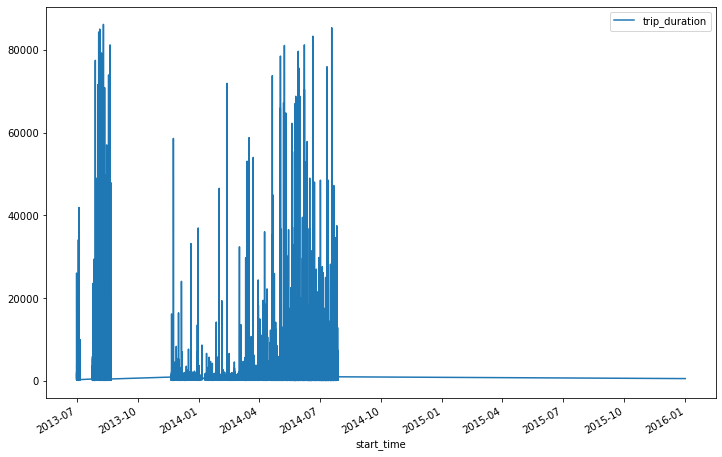

In [4]:
df3.columns=['trip_duration']
df3.plot(figsize=(12,8))

In [5]:
df3['trip_duration_LastShift']=df3['trip_duration'].shift(+1)
df3['trip_duration_2LastShift']=df3['trip_duration'].shift(+2)
df3['trip_duration_3LastShift']=df3['trip_duration'].shift(+3)
df3

,trip_duration,trip_duration_LastShift,trip_duration_2LastShift,trip_duration_3LastShift
start_time,,,,
2013-06-30 11:04:00,1538,NaN,NaN,NaN
2013-06-30 11:35:00,1108,1538.0,NaN,NaN
2013-06-30 11:55:00,2063,1108.0,1538.0,NaN
2013-06-30 12:03:00,775,2063.0,1108.0,1538.0
2013-06-30 12:15:00,784,775.0,2063.0,1108.0
...,...,...,...,...
2014-07-27 19:17:00,183,2005.0,4444.0,4440.0
2014-07-27 19:18:00,421,183.0,2005.0,4444.0
2014-07-27 19:18:00,1150,421.0,183.0,2005.0


In [6]:
df3=df3.dropna()
df3

,trip_duration,trip_duration_LastShift,trip_duration_2LastShift,trip_duration_3LastShift
start_time,,,,
2013-06-30 12:03:00,775,2063.0,1108.0,1538.0
2013-06-30 12:15:00,784,775.0,2063.0,1108.0
2013-06-30 12:25:00,833,784.0,775.0,2063.0
2013-06-30 12:31:00,198,833.0,784.0,775.0
2013-06-30 12:49:00,1853,198.0,833.0,784.0
...,...,...,...,...
2014-07-27 19:17:00,183,2005.0,4444.0,4440.0
2014-07-27 19:18:00,421,183.0,2005.0,4444.0
2014-07-27 19:18:00,1150,421.0,183.0,2005.0


In [7]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [8]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)

In [9]:
import numpy as np
x1,x2,x3,y=df3['trip_duration_LastShift'],df3['trip_duration_2LastShift'],df3['trip_duration_3LastShift'],df3['trip_duration']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[2063. 1108. 1538.]
 [ 775. 2063. 1108.]
 [ 784.  775. 2063.]
 ...
 [ 421.  183. 2005.]
 [1150.  421.  183.]
 [ 951. 1150.  421.]]


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[-30:],y[-30:]

In [11]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [75967, 30]

In [ ]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(lin_pred,label="Linear_Regression_Predictions")
plt.plot(y_test,label="Actual Sales")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)